In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import warnings
# Dependency imports
#from absl import flags
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
import numpy as np
import pickle 
warnings.simplefilter(action="ignore")
import statistics
import numpy, scipy.io
#from preprocessplot import accuracies, losses
#from plots import tsplotseveralacc, tsplotseveralloss

In [5]:
losses = 'CIFAR/resnet/'
with open (losses+'result_adagrad_b128/Decay_True_lr0.01_no1_b128_m0.9_adagrad', 'rb') as fp:
    adagrad = pickle.load(fp)

In [8]:
scipy.io.savemat(losses+'result_adagrad_b128/adagrad.mat', mdict={'adagrad': adagrad})

# TEST ACCURACIES

In [2]:
def accuracies(adagrad, adabound, adam, padam, rmsprop, sgd, sagd):
  adagradacc = adagrad['test_acc']
  adaboundacc = adabound['test_acc']
  adamacc = adam['test_acc']
  padamacc = padam['test_acc']
  rmspropacc = rmsprop['test_acc']
  sgdacc = sgd['test_acc']
  sagdacc = sagd['test_acc']
  list_maxs = []
  for element in adagradacc:
      mins = []
      for ind in element:
          mins.append(max(ind))
      list_maxs.append(mins)
  adagradacc2 = list(map(list, zip(*list_maxs)))
  list_maxs = []
  for element in adaboundacc:
      mins = []
      for ind in element:
          mins.append(max(ind))
      list_maxs.append(mins)
  adaboundacc2 = list(map(list, zip(*list_maxs)))
  list_maxs = []
  for element in adamacc:
      mins = []
      for ind in element:
          mins.append(max(ind))
      list_maxs.append(mins)
  adamacc2 = list(map(list, zip(*list_maxs)))
  list_maxs = []
  for element in padamacc:
      mins = []
      for ind in element:
          mins.append(max(ind))
      list_maxs.append(mins)
  padamacc2 = list(map(list, zip(*list_maxs)))
  list_maxs = []
  for element in rmspropacc:
      mins = []
      for ind in element:
          mins.append(max(ind))
      list_maxs.append(mins)
  rmspropacc2 = list(map(list, zip(*list_maxs)))
  list_maxs = []
  for element in sgdacc:
      mins = []
      for ind in element:
          mins.append(max(ind))
      list_maxs.append(mins)
  sgdacc2 = list(map(list, zip(*list_maxs)))
  list_maxs = []
  for element in sagdacc:
      mins = []
      for ind in element:
          mins.append(max(ind))
      list_maxs.append(mins)
  sagdacc2 = list(map(list, zip(*list_maxs)))
  return adagradacc2, adaboundacc2, adamacc2, padamacc2, rmspropacc2, sgdacc2, sagdacc2

def losses(adagradloss, adaboundloss, adamloss, padamloss, rmsproploss, sgdloss, sagdloss):
  list_mins = []
  for element in sagdloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  sagdloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adagradloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adagradloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adaboundloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adaboundloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adamloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adamloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in padamloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  padamloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in rmsproploss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  rmsproploss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in sgdloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  sgdloss2 = list(map(list, zip(*list_mins)))
  return adagradloss2, adaboundloss2, adamloss2, padamloss2, rmsproploss2, sgdloss2, sagdloss2

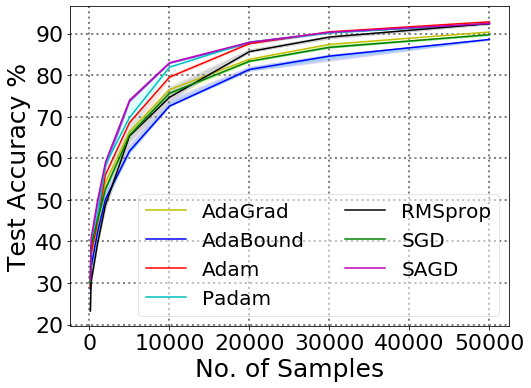

In [4]:
adagradacc2, adaboundacc2, adamacc2, padamacc2, rmspropacc2, sgdacc2, sagdacc2 = accuracies(adagrad, adabound, adam, padam, rmsprop, sgd, sagd)
iterations = len(adagradacc2[0])
itera = [100, 200, 1000,2000, 5000, 10000, 20000,30000, 50000]
#itera = np.linspace(0,iterations,iterations)
figsize = (7.5, 5.5)
leg_fontsize= 20
axis_fontsize = 25
toplot = [adagradacc2, adaboundacc2, adamacc2, padamacc2, rmspropacc2, sgdacc2, sagdacc2]
def tsplotseveralacc(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','c','black','g','m']
    colors=['lightyellow','lightskyblue','mistyrose','lightcyan','lightgrey','lightgreen', 'blueviolet']
    labels= ['AdaGrad', 'AdaBound', 'Adam', 'Padam', 'RMSprop', 'SGD', 'SAGD']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=2)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('No. of Samples', fontsize=axis_fontsize)
    plt.ylabel('Test Accuracy %', fontsize=axis_fontsize)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.grid(linestyle='dotted',linewidth=2)
    plt.locator_params(axis="y", integer=True, tight=True)
    #pylab.ticklabel_format(axis='x',style='sci',scilimits=(1,2))
    fig.tight_layout()
    #fig.show()
    #fig.savefig("figures/resnet/resnetacc200epbis.png",bbox_inches = 'tight')
tsplotseveralacc(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

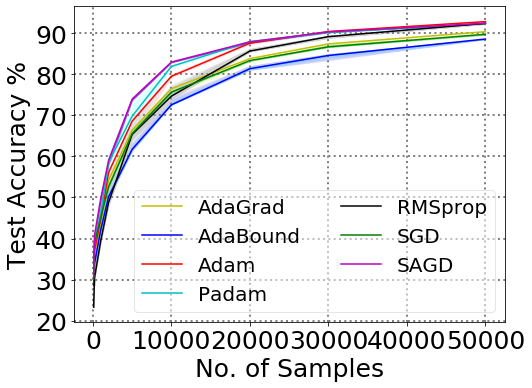

In [17]:
def tsplotseveralacc(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','c','black','g','m']
    colors=['lightyellow','lightskyblue','mistyrose','lightcyan','lightgrey','lightgreen', 'blueviolet']
    labels= ['AdaGrad', 'AdaBound', 'Adam', 'Padam', 'RMSprop', 'SGD', 'SAGD']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=2)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('No. of Samples', fontsize=axis_fontsize)
    plt.ylabel('Test Accuracy %', fontsize=axis_fontsize)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.grid(linestyle='dotted',linewidth=2)
    plt.locator_params(axis="both", integer=True, tight=True)
    #pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,2))
    fig.tight_layout()
    #fig.show()
    fig.savefig("figures/resnet/resnetacc200ep.png",bbox_inches = 'tight')
    
iterations = len(adagradacc2[0])
itera = [100, 200, 1000,2000, 5000, 10000, 20000,30000, 50000]
#itera = np.linspace(0,iterations,iterations)
figsize = (7.5, 5.5)
leg_fontsize= 20
axis_fontsize = 25
toplot = [adagradacc2, adaboundacc2, adamacc2, padamacc2, rmspropacc2, sgdacc2, sagdacc2]
tsplotseveralacc(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')

# TEST LOSSES

In [4]:
adagradloss = adagrad['test_loss']
adaboundloss = adabound['test_loss']
adamloss = adam['test_loss']
padamloss = padam['test_loss']
rmsproploss = rmsprop['test_loss']
sgdloss = sgd['test_loss']
sagdloss = sagd['test_loss']
def losses(adagradloss, adaboundloss, adamloss, padamloss, rmsproploss, sgdloss, sagdloss):
  list_mins = []
  for element in sagdloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  sagdloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adagradloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adagradloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adaboundloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adaboundloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in adamloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  adamloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in padamloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  padamloss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in rmsproploss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  rmsproploss2 = list(map(list, zip(*list_mins)))
  list_mins = []
  for element in sgdloss:
      mins = []
      for ind in element:
          mins.append(min(ind))
      list_mins.append(mins)
  sgdloss2 = list(map(list, zip(*list_mins)))
  return adagradloss2, adaboundloss2, adamloss2, padamloss2, rmsproploss2, sgdloss2, sagdloss2

In [5]:
adagradloss2, adaboundloss2, adamloss2, padamloss2, rmsproploss2, sgdloss2, sagdloss2 = losses(adagradloss, adaboundloss, adamloss, padamloss, rmsproploss, sgdloss, sagdloss)

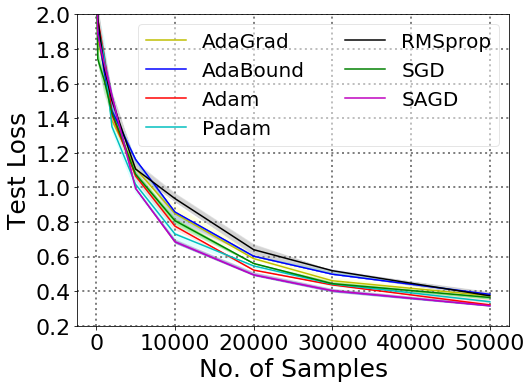

In [14]:
def tsplotseveralloss(x, y,figsize,leg_fontsize, axis_fontsize, n=20, percentile_min=1, percentile_max=99, color='r', plot_mean=True, plot_median=False, line_color='k', **kwargs):
    line_colors=['y','b','r','c','black','g','m']
    colors=['lightyellow','lightskyblue','mistyrose','lightcyan','lightgrey','lightgreen', 'blueviolet']
    labels= ['AdaGrad', 'AdaBound', 'Adam', 'Padam', 'RMSprop', 'SGD', 'SAGD']
    i = 0
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=figsize)
    axes.set_facecolor('white')
    axes.grid(linestyle='-', linewidth='0.2', color='grey')
    axes.spines['bottom'].set_color('black')
    axes.spines['top'].set_color('black') 
    axes.spines['right'].set_color('black')
    axes.spines['left'].set_color('black')
    
    for element in y:
      perc1 = np.percentile(element, np.linspace(percentile_min, 50, num=n, endpoint=False), axis=0)
      perc2 = np.percentile(element, np.linspace(50, percentile_max, num=n+1)[1:], axis=0)

      # fill lower and upper percentile groups
      for p1, p2 in zip(perc1, perc2):
          plt.fill_between(x, p1, p2, color=colors[i], edgecolor=None,alpha=0.002)

      if plot_mean:
          plt.plot(x, np.mean(element, axis=0), color=line_colors[i],label=labels[i])


      if plot_median:
          plt.plot(x, np.median(element, axis=0), color=line_colors[i],label=labels[i])
      i += 1
    leg = plt.legend(fontsize=leg_fontsize,fancybox=True, loc=0,ncol=2)
    leg.get_frame().set_alpha(0.5)
    plt.xlabel('No. of Samples', fontsize=axis_fontsize)
    plt.ylabel('Test Loss', fontsize=axis_fontsize)
    plt.xticks(fontsize=22)
    plt.yticks(fontsize=22)
    plt.ylim(top=2) 
    plt.ylim(bottom=0.2)
    plt.grid(linestyle='dotted',linewidth=2)
    plt.locator_params(axis="both", integer=False, tight=True)
    #pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,1))
    fig.tight_layout()
    fig.savefig("figures/resnet/resnetloss200ep.png",bbox_inches = 'tight')
    
iterations = len(adagradloss2[0])
itera = [100, 200, 1000,2000, 5000, 10000, 20000,30000, 50000]
#itera = np.linspace(0,iterations,iterations)
figsize = (7.5, 5.5)
leg_fontsize= 20
axis_fontsize = 25
toplot = [adagradloss2, adaboundloss2, adamloss2, padamloss2, rmsproploss2, sgdloss2, sagdloss2]
tsplotseveralloss(itera,toplot,figsize,leg_fontsize, axis_fontsize,
              n=100, percentile_min=2.5, percentile_max=97.5, plot_median=True, plot_mean=False, color='g', line_color='navy')